<a href="https://colab.research.google.com/github/kalebsu/UAS_AI/blob/main/Klasifikasi_Obesitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Klasifikasi obesitas menggunakan KNN**

dibuat oleh :

Nama : **Kaleb Suy**

NIM : 312110390

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fdata="https://raw.githubusercontent.com/kalebsu/UAS_AI/refs/heads/main/dataset/Obesity_Classification.csv"

df = pd.read_csv(fdata)
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [3]:
#Cek Jumlah data, jumlah duplikasi, dan jumlah setelah dihapus baris duplikasi
print(f"Jumlah data : {df.shape[0]}")
print(f"Jumlah data duplikasi : {df[df.duplicated()].shape[0]}")
#Drop duplicated
df.drop_duplicates(inplace=True)
print(f"Jumlah setelah dihapus data duplikasi : {df.shape[0]}")

Jumlah data : 108
Jumlah data duplikasi : 0
Jumlah setelah dihapus data duplikasi : 108


In [4]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [6]:
from sklearn.model_selection import train_test_split
y=df.Gender
X=df.drop("Gender", axis=1)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, shuffle=True, stratify=y,random_state=12)
print(f"Jumlah data train : {len(x_train)}")
print(f"Jumlah data test : {len(x_test)}")

Jumlah data train : 86
Jumlah data test : 22


In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [13]:
from sklearn.preprocessing import LabelEncoder

# Buat salinan data
df_numeric = df.copy()

# Label Encoding
label_encoder = LabelEncoder()
df_numeric['Label'] = label_encoder.fit_transform(df['Label'])

print(df_numeric)

      ID  Age  Gender  Height  Weight   BMI  Label
0      1   25    Male     175      80  25.3      0
1      2   30  Female     160      60  22.5      0
2      3   35    Male     180      90  27.3      2
3      4   40  Female     150      50  20.0      3
4      5   45    Male     190     100  31.2      1
..   ...  ...     ...     ...     ...   ...    ...
103  106   11    Male     175      10   3.9      3
104  107   16  Female     160      10   3.9      3
105  108   21    Male     180      15   5.6      3
106  109   26  Female     150      15   5.6      3
107  110   31    Male     190      20   8.3      3

[108 rows x 7 columns]


In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, shuffle=True, stratify=y,random_state=12)
print(f"Jumlah data train : {len(x_train)}")
print(f"Jumlah data test : {len(x_test)}")

Jumlah data train : 86
Jumlah data test : 22


In [25]:
# Perform Label Encoding on the entire dataset before splitting
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Now proceed with splitting the data
X = df.drop("Gender", axis=1)  # Use the updated DataFrame with encoded 'Label'
y = df.Gender
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=12)

# Continue with scaling
scl = StandardScaler()
x_train_scl = scl.fit_transform(x_train)
x_test_scl = scl.transform(x_test)

# ... rest of your code ...

In [26]:
scl=StandardScaler()
x_train_scl=scl.fit_transform(x_train)
x_test_scl=scl.transform(x_test)

lbl_encoder=LabelEncoder()
y_train_enc=lbl_encoder.fit_transform(y_train)
y_test_enc=lbl_encoder.transform(y_test)

In [27]:
x_train

,ID,Age,Height,Weight,BMI,Label
16,17,48,200,100,31.2,1
69,72,20,160,30,13.3,3
90,93,48,130,40,16.7,3
84,87,18,160,20,8.3,3
65,68,51,130,65,22.7,0
...,...,...,...,...,...,...
19,21,63,120,30,13.3,3
64,67,46,200,85,26.1,2
35,38,54,130,85,27.5,2
99,102,42,200,30,13.3,3


In [28]:
x_train_scl

array([[-1.37176353e+00,  1.60759683e-01,  1.17062223e+00,
         1.36863803e+00,  1.38479240e+00, -6.48495095e-01],
       [ 4.25588685e-01, -1.07207253e+00, -2.70143591e-01,
        -1.00235505e+00, -9.24294930e-01,  9.68043403e-01],
       [ 1.11185044e+00,  1.60759683e-01, -1.35071796e+00,
        -6.63641752e-01, -4.85697336e-01,  9.68043403e-01],
       [ 9.15775652e-01, -1.16013198e+00, -2.70143591e-01,
        -1.34106835e+00, -1.56929139e+00,  9.68043403e-01],
       [ 2.94872160e-01,  2.92848849e-01, -1.35071796e+00,
         1.83141492e-01,  2.88298419e-01, -1.45676434e+00],
       [ 7.85059128e-01, -8.95953646e-01,  4.50239319e-01,
        -4.94285103e-01, -2.27698751e-01,  9.68043403e-01],
       [ 1.27524610e+00, -9.84013090e-01,  4.50239319e-01,
        -1.34106835e+00, -1.56929139e+00,  9.68043403e-01],
       [ 5.56305210e-01, -1.91478093e-01, -9.90526501e-01,
        -3.24928454e-01, -5.99996709e-02,  9.68043403e-01],
       [ 6.21663472e-01,  2.48819127e-01, -1.350

In [29]:
y_train


,Gender
16,Male
69,Female
90,Female
84,Female
65,Female
...,...
19,Female
64,Male
35,Female
99,Male


In [30]:
y_train_enc


array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_scl, y_train_enc)

KNeighborsClassifier()

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
knn_predictions = knn_classifier.predict(x_test_scl)
knn_accuracy = accuracy_score(y_test_enc, knn_predictions)

print(f'KNN accuracy: {knn_accuracy:.2f}')

KNN accuracy: 1.00


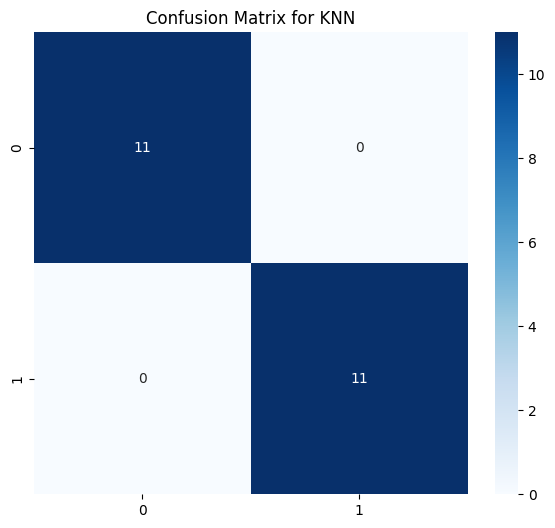

In [35]:
cm=confusion_matrix(y_test_enc,knn_predictions)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for KNN')
plt.show()

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
knn=KNeighborsClassifier(n_neighbors=5)
score_sc=cross_val_score(knn,x_train_scl,y_train_enc,cv=5)
print(score_sc)
print(f"Rata score dengan 5 fold : {score_sc.mean()}")

[1.         0.94117647 0.94117647 1.         0.88235294]
Rata score dengan 5 fold : 0.9529411764705882


In [38]:
n_=range(1,51,2)
train,test=[],[]
for n in n_:
  knn=KNeighborsClassifier(n_neighbors=n)
  knn.fit(x_train_scl,y_train_enc)
  train.append(knn.score(x_train_scl,y_train_enc))
  test.append(knn.score(x_test_scl,y_test_enc))

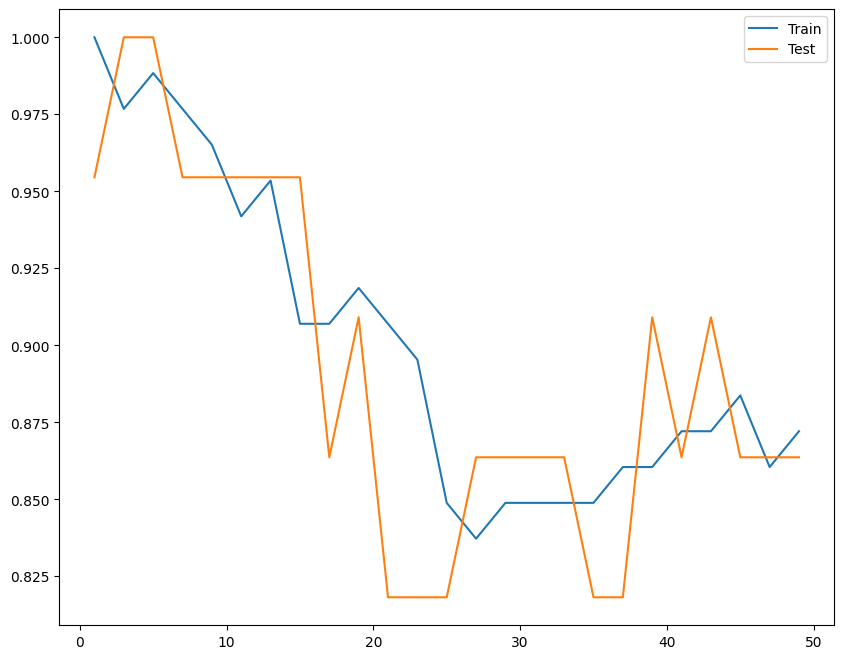

In [39]:
plt.figure(figsize=(10,8))
plt.plot(n_,train, label='Train')
plt.plot(n_,test, label='Test')

plt.legend()
plt.show()

In [40]:
print(f"Max Test Score adalah {np.max(test)}")
print(f"K Neighboard terbaik adalah {n_[np.argmax(test)]}")

Max Test Score adalah 1.0
K Neighboard terbaik adalah 3
